In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from operator import itemgetter, attrgetter

In [442]:
pd.set_option('display.max_rows', 5)

# BASES DE DATOS DE DOCENTES

**PADRÓN DE UNIVERSIDADES PERUANAS**

In [443]:
lista_us = pd.read_stata('Z:/proce_doc/docentes - copia/bd_trabajadas/tab_match.dta')

lista_us['tipodegestiÓn'] = lista_us.tipodegestiÓn.str.capitalize()
lista_us['dominio'] = lista_us['dominio'].replace('Lima Callao', 'Lima metropolitana')
lista_us

,cod_univ,universidad,tipodegestiÓn,regiondepartamento,provincia,distrito,ubigeo,dominio
0,001,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,Pública,LIMA,LIMA,LIMA,150101,Lima metropolitana
1,002,UNIVERSIDAD NACIONAL DE SAN CRISTÓBAL DE HUAMANGA,Pública,AYACUCHO,HUAMANGA,AYACUCHO,050101,Sierra
...,...,...,...,...,...,...,...,...
141,148,UNIVERSIDAD SEMINARIO BÍBLICO ANDINO,Privada asociativa,LIMA,LIMA,PUEBLO LIBRE,150121,Lima metropolitana
142,149,UNIVERSIDAD CATÓLICA SAN JOSÉ,Privada asociativa,LIMA,LIMA,PUEBLO LIBRE,150121,Lima metropolitana


**AIRHSP**

In [444]:
airhsp = pd.read_stata('Z:/proce_doc/docentes - copia/bd_trabajadas/AIRHSP.dta')
print('N° obs. de la base de datos:', len(airhsp))
print('N° universidades consideradas:', len(set(airhsp.cod_univ)))
airhsp

N° obs. de la base de datos: 23912
N° universidades consideradas: 49


,cod_univ,ejercicio_m,nomb_uni,exedente_m,ctipdocum_m,dni,dni_1,apepat_m,apemat_m,nombres_m,...,fechnac_m,estado_m,desingreso_m,feching_m,regimen_pensionario_m,vinc_doc,cate_doc,regi_doc,hor_total,dominio
0,001,2019,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,OCUPADO,DNI,00064196,00064196,ARA,GOMEZ,MIGUEL ANGEL,...,15-Jul-49,1,Concurso,08/01/1976,DL.25897 - SPP,Ordinario,principal,Dedicacion exclusiva,40.0,Lima metropolitana
1,001,2019,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,OCUPADO,DNI,07721429,07721429,ACEVEDO,BASURTO,SARA,...,22-Sep-44,1,Concurso,01/08/1975,DL.19990 - SNP,NaN,NaN,NaN,40.0,Lima metropolitana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23910,139,2019,UNIVERSIDAD NACIONAL CIRO ALEGRIA,OCUPADO,DNI,28064395,28064395,REVILLA,ARCE,JEIDEN,...,11-Apr-66,1,Concurso,10/12/2018,DL.19990 - SNP,Ordinario,Auxiliar,Tiempo completo,40.0,Sierra
23911,139,2019,UNIVERSIDAD NACIONAL CIRO ALEGRIA,OCUPADO,DNI,17882129,17882129,GAITAN,MEREJILDO,GERARDO,...,16-Oct-58,1,Concurso,04/01/2019,DL.25897 - SPP,Ordinario,Auxiliar,Tiempo completo,40.0,Sierra


**FORMATOS DE LICENCIAMIENTO C9 CONSOLIDADOS**

*A NIVEL DE DOCENTES*

In [445]:
c9_comp = pd.read_stata('Z:/proce_doc/docentes - copia/bd_trabajadas/C9_comp.dta')
print('N° obs. de la base de datos:', len(c9_comp))
print('N° universidades consideradas:', len(set(c9_comp.cod_univ)))
c9_comp

N° obs. de la base de datos: 74260
N° universidades consideradas: 140


,n,univ,cod_univ,gestion,estado,ape_pat,ape_mat,nomb,nacionalidad,dni,...,ense_pre1,ense_pos,ense_doc,vinc_doc,cate_doc,regi_doc,regi_doc2,hor_clas,hor_otra,hor_total
0,35678,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,001,PÚBLICA,LICENCIADA,PRETELL,HARO,LUZ ELENA,Perú,10302377,...,Si,No,No,Ordinario,Auxiliar,Tiempo parcial,Tiempo parcial,12.0,8.0,20.0
1,36223,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,001,PÚBLICA,LICENCIADA,CASTRO,CHONTA,AMADO CRISOGONO,Perú,08429542,...,Si,No,No,Ordinario,Asociado,Tiempo completo,Tiempo completo,18.0,22.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74258,23982,UNIVERSIDAD CATÓLICA SAN JOSÉ,149,PRIVADA,EN PROCESO DE LICENCIAMIENTO,Cruz,Herrera,Magdalena Teotista,Perú,10345736,...,Si,No,No,Contratado,NaN,Tiempo parcial,Tiempo parcial,20.0,0.0,20.0
74259,24021,UNIVERSIDAD CATÓLICA SAN JOSÉ,149,PRIVADA,EN PROCESO DE LICENCIAMIENTO,Tonsmann,Vásquez,Dick,Perú,06636270,...,Si,Si,No,Ordinario,Asociado,Tiempo completo,Tiempo completo,40.0,0.0,40.0


*A NIVEL DE UNIVERSIDADES*

In [446]:
c9_univ = pd.merge(
            pd.DataFrame(c9_comp[['cod_univ', 'vinc_doc']].pivot_table(index='cod_univ', columns='vinc_doc', aggfunc=len).to_records()), 
            pd.merge(
                pd.DataFrame(c9_comp[['cod_univ', 'cate_doc']].pivot_table(index='cod_univ', columns='cate_doc', aggfunc=len).to_records()), 
                pd.DataFrame(c9_comp[['cod_univ', 'regi_doc2']].pivot_table(index='cod_univ', columns='regi_doc2', aggfunc=len).to_records()), 
                left_on = 'cod_univ', right_on = 'cod_univ', how = 'outer'), 
            left_on = 'cod_univ', right_on = 'cod_univ', how = 'outer')

c9_univ

,cod_univ,Contratado,Ordinario,Extraordinario,Auxiliar,Asociado,principal,Tiempo completo,Tiempo parcial
0,001,11.0,2920.0,NaN,979.0,1183.0,758.0,1068.0,1863.0
1,002,186.0,406.0,NaN,200.0,108.0,98.0,312.0,280.0
...,...,...,...,...,...,...,...,...,...
138,149,34.0,26.0,NaN,17.0,2.0,7.0,20.0,40.0
139,108,NaN,NaN,NaN,NaN,NaN,NaN,28.0,78.0


**INFORMACIÓN DE DOCENTES DESDE LAS RESOLUCIONES DE LICENCIAMIENTO**

In [447]:
resoluciones = pd.read_stata('Z:/proce_doc/docentes - copia/bd_trabajadas/resoluciones.dta')
print('N° obs. de la base de datos:', len(resoluciones))
#print('N° universidades consideradas:', len(set(resoluciones.codigo)))
print('N° universidades consideradas: 101')
print('Nota: Se trata de 101 universidades más 2 escuelas de posgrado')
resoluciones

N° obs. de la base de datos: 103
N° universidades consideradas: 101
Nota: Se trata de 101 universidades más 2 escuelas de posgrado


,fuente,nom_uni,codigo,tip_gest2,estado,per_acad,estud,tod_docentes,estu_doc,num_maestros,...,doc_ordi_prin,doc_extra,doc_exclu,doc_tiempo_comp,doc_maest_ext,doc_docto_ext,tip_gest,gran_dom,doc_tiempo_parcial,num_bachiller
0,Resolución e Informe Técnico de Licenciamiento,UNIVERSIDAD NACIONAL AGRARIA DE LA SELVA,022,PÚBLICA,LICENCIADA,2018-2,3169.0,202,15.688119,105.0,...,55.0,0.0,167,1.0,11.0,7.0,1.0,4.0,34.0,53.0
1,Resolución e Informe Técnico de Licenciamiento,UNIVERSIDAD NACIONAL DE PIURA,013,PÚBLICA,LICENCIADA,2018-2,14249.0,624,22.834936,252.0,...,277.0,0.0,282,243.0,10.0,20.0,1.0,2.0,99.0,117.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Resolución e Informe Técnico de Licenciamiento,UNIVERSIDAD CIENCIAS DE LA SALUD S.A.C.,111,PRIVADA,LICENCIA DENEGADA,2019-1,390.0,55,7.090909,37.0,...,NaN,NaN,0,12.0,NaN,NaN,3.0,3.0,43.0,0.0
102,Resolución e Informe Técnico de Licenciamiento,UNIVERSIDAD NACIONAL SAN LUIS GONZAGA,009,PRIVADA,LICENCIA DENEGADA,2019-1,19472.0,897,21.707915,481.0,...,NaN,NaN,460,199.0,NaN,NaN,1.0,2.0,238.0,150.0


**SIBE 2019: RELACIÓN DE DOCENTES**

In [448]:
sibe_2019 = pd.read_stata('Z:/proce_doc/docentes - copia/bd_trabajadas/sibe_2019.dta')
print('N° obs. de la base de datos:', len(sibe_2019))
print('N° universidades consideradas:', len(set(sibe_2019.cod_univ)))
sibe_2019

N° obs. de la base de datos: 52049
N° universidades consideradas: 101


,cod_univ,Id,n,ape_nomb,doc_sex,nacionalidad,tip_docu,num_docu,vinc_doc,cate_doc,regi_doc,may_grad2,hor_total,doc_inves,dominio,gestion2
0,004,45442,372.0,GARCIA VINATEA JORGE RICARDO,Hombre,Perú,Seleccione,41264351,Contratado,NaN,Tiempo completo,Maestro,40.0,NaN,Costa,PÚBLICA
1,004,45506,623.0,NOLASCO SOLORZANO SANDRA DORIS,Mujer,Perú,Seleccione,41490182,Contratado,NaN,Tiempo completo,Maestro,40.0,NaN,Costa,PÚBLICA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52047,149,45323,150.0,"Osorio Cáceres, Julio César",Hombre,Perú,DNI,07604476,Contratado,NaN,Tiempo parcial,Doctor,8.0,NaN,Lima metropolitana,PRIVADA ASOCIATIVA
52048,149,45291,118.0,"Chirinos Pacheco De Rivero, Jessica Ivonne",Mujer,Perú,DNI,29616719,Ordinario,Auxiliar,Tiempo completo,Maestro,40.0,NaN,Lima metropolitana,PRIVADA ASOCIATIVA


# PROCESAMIENTO

In [493]:
g2 = pd.merge(c9_univ, resoluciones[['codigo', 'estado',  'doc_contra', 'doc_ordi', 'doc_ordi_aux', 'doc_ordi_asoc', 'doc_ordi_prin',
                                'doc_extra', 'doc_exclu', 'doc_tiempo_comp', 'doc_tiempo_parcial']], 
         left_on = 'cod_univ', right_on = 'codigo', how = 'outer')
g2 = g2[g2.codigo != '-']
g2['estado'] = g2.estado.replace(np.nan, 'En proceso')
g2['estado'] = g2.estado.str.capitalize()
g2.estado.value_counts(dropna = False)
g2

#Recode ordinario
g2['Docente ordinario'] = np.where(g2.estado == "Licenciada", g2['doc_ordi'], 
                                    np.where(g2.estado == "En proceso", 
                                             g2['Ordinario'], np.nan))

#Recode contratado
g2['Docente contratado'] = np.where(g2.estado == "Licenciada", g2['doc_contra'], 
                                    np.where(g2.estado == "En proceso", 
                                             g2['Contratado'], np.nan))

#Recode extraordinario
g2['Docente extraordinario'] = np.where(g2.estado == "Licenciada", g2['doc_extra'], 
                                    np.where(g2.estado == "En proceso", 
                                             g2['Extraordinario'], np.nan))

#Recode Principal
g2['Docente principal'] = np.where(g2.estado == "Licenciada", g2['doc_ordi_prin'], 
                                    np.where(g2.estado == "En proceso", 
                                             g2['principal'], np.nan))

#Recode Asociado
g2['Docente asociado'] = np.where(g2.estado == "Licenciada", g2['doc_ordi_asoc'], 
                                    np.where(g2.estado == "En proceso", 
                                             g2['Asociado'], np.nan))

#Recode Auxiliar
g2['Docente auxiliar'] = np.where(g2.estado == "Licenciada", g2['doc_ordi_aux'], 
                                    np.where(g2.estado == "En proceso", 
                                             g2['Auxiliar'], np.nan))

#g2 = g2[['cod_univ', 'estado', 'Contratado', 'Ordinario', 'Extraordinario', 'doc_ordi', 'doc_contra', 'doc_extra', 'Docente ordinario', 'Docente contratado', 'Docente extraordinario']]
#g2 = g2[['cod_univ', 'estado', 'Docente ordinario', 'Docente contratado', 'Docente extraordinario']]

g2 = pd.merge(g2, lista_us[['cod_univ', 'universidad', 'tipodegestiÓn', 'dominio']], left_on = 'cod_univ', right_on = 'cod_univ', how = 'inner')
g2

,cod_univ,Contratado,Ordinario,Extraordinario,Auxiliar,Asociado,principal,Tiempo completo,Tiempo parcial,codigo,...,doc_tiempo_parcial,Docente ordinario,Docente contratado,Docente extraordinario,Docente principal,Docente asociado,Docente auxiliar,universidad,tipodegestiÓn,dominio
0,001,11.0,2920.0,NaN,979.0,1183.0,758.0,1068.0,1863.0,001,...,1412.0,2920.0,11.0,0.0,758.0,1183.0,979.0,UNIVERSIDAD NACIONAL MAYOR DE SAN MARCOS,Pública,Lima metropolitana
1,002,186.0,406.0,NaN,200.0,108.0,98.0,312.0,280.0,002,...,82.0,406.0,186.0,0.0,98.0,108.0,200.0,UNIVERSIDAD NACIONAL DE SAN CRISTÓBAL DE HUAMANGA,Pública,Sierra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,149,34.0,26.0,NaN,17.0,2.0,7.0,20.0,40.0,NaN,...,NaN,26.0,34.0,NaN,7.0,2.0,17.0,UNIVERSIDAD CATÓLICA SAN JOSÉ,Privada asociativa,Lima metropolitana
139,108,NaN,NaN,NaN,NaN,NaN,NaN,28.0,78.0,108,...,78.0,0.0,0.0,0.0,0.0,0.0,0.0,UNIVERSIDAD DE CIENCIAS Y ARTES DE AMÉRICA LATINA,Privada societaria,Lima metropolitana


In [494]:
print(list(g2))

['cod_univ', 'Contratado', 'Ordinario', 'Extraordinario', 'Auxiliar', 'Asociado', 'principal', 'Tiempo completo', 'Tiempo parcial', 'codigo', 'estado', 'doc_contra', 'doc_ordi', 'doc_ordi_aux', 'doc_ordi_asoc', 'doc_ordi_prin', 'doc_extra', 'doc_exclu', 'doc_tiempo_comp', 'doc_tiempo_parcial', 'Docente ordinario', 'Docente contratado', 'Docente extraordinario', 'Docente principal', 'Docente asociado', 'Docente auxiliar', 'universidad', 'tipodegestiÓn', 'dominio']


# GRÁFICOS Y TABLAS DEL CAPÍTULO 2

**Gráfico 2.1. Porcentaje de puestos docentes, por tipo de plaza, según gran dominio y total nacional. Licenciamiento**

In [495]:
g21 = g2.groupby('dominio')[['Docente contratado', 'Docente ordinario', 'Docente extraordinario']].agg('sum').transpose()
g21['Total nacional'] = g21.sum(axis = 1)
g21 = g21.transpose()

dominio = ['Lima metropolitana', 'Costa', 'Sierra', 'Selva', 'Total nacional']
g21.index = pd.CategoricalIndex(g21.index, categories=dominio, ordered=True)
g21 = g21.sort_index()

g21

,Docente contratado,Docente ordinario,Docente extraordinario
dominio,,,
Lima metropolitana,22714.0,9435.0,834.0
Costa,13699.0,4295.0,340.0
Sierra,8043.0,6037.0,210.0
Selva,1717.0,1606.0,0.0
Total nacional,46173.0,21373.0,1384.0


In [496]:
g21 = g21.apply(lambda x: x/x.sum()*100, axis=1)
g21

,Docente contratado,Docente ordinario,Docente extraordinario
dominio,,,
Lima metropolitana,68.865779,28.605645,2.528575
Costa,74.719101,23.426421,1.854478
Sierra,56.284115,42.246326,1.469559
Selva,51.670178,48.329822,0.000000
Total nacional,66.985347,31.006819,2.007834


GRÁFICO DE BARRAS


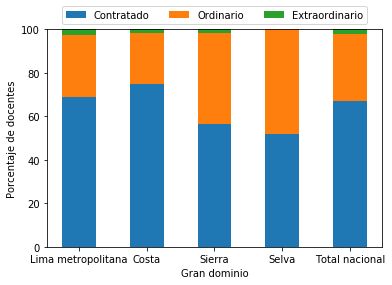

In [497]:
#Plot
print('GRÁFICO DE BARRAS')
plt.bar(g21.index, g21['Docente contratado'], 0.5, label = 'Contratado')
plt.bar(g21.index, g21['Docente ordinario'], 0.5, bottom = g21['Docente contratado'], label = 'Ordinario')
plt.bar(g21.index, g21['Docente extraordinario'], 0.5, bottom = g21['Docente contratado'] + g21['Docente ordinario'], label = 'Extraordinario')
plt.xlabel('Gran dominio')
plt.ylabel('Porcentaje de docentes')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5,1), ncol = 3)
plt.show()

MAPA DE CALOR


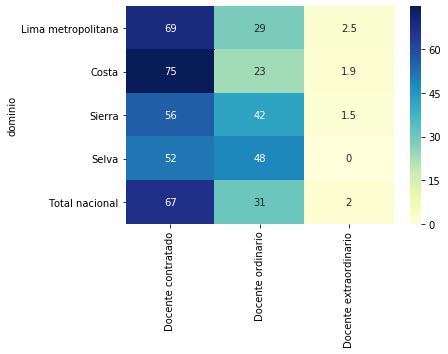

In [498]:
print('MAPA DE CALOR')
sns.heatmap(g21, annot=True, cmap="YlGnBu")
plt.show()

**Gráfico 2.2. Porcentaje de puestos docentes, por tipo de vinculación laboral, según tipo de gestión. Licenciamiento**

In [499]:
g22 = g2.groupby('tipodegestiÓn')[['Docente contratado', 'Docente ordinario', 'Docente extraordinario']].agg('sum').transpose()
g22 = g22.transpose()

gestion = ['Pública', 'Privada asociativa', 'Privada societaria']
g22.index = pd.CategoricalIndex(g22.index, categories=gestion, ordered=True)
g22 = g22.sort_index()

g22

,Docente contratado,Docente ordinario,Docente extraordinario
tipodegestiÓn,,,
Pública,6674.0,16026.0,119.0
Privada asociativa,18491.0,4300.0,513.0
Privada societaria,21008.0,1047.0,752.0


In [500]:
g22 = g22.apply(lambda x: x/x.sum()*100, axis=1)
g22

,Docente contratado,Docente ordinario,Docente extraordinario
tipodegestiÓn,,,
Pública,29.247557,70.230948,0.521495
Privada asociativa,79.346893,18.451768,2.201339
Privada societaria,92.112071,4.590696,3.297233


GRÁFICO DE BARRAS


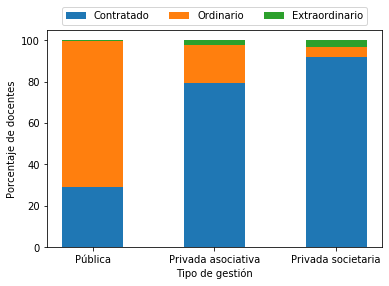

In [501]:
#Plot
print('GRÁFICO DE BARRAS')
plt.bar(g22.index, g22['Docente contratado'], 0.5, label = 'Contratado')
plt.bar(g22.index, g22['Docente ordinario'], 0.5, bottom = g22['Docente contratado'], label = 'Ordinario')
plt.bar(g22.index, g22['Docente extraordinario'], 0.5, bottom = g22['Docente contratado'] + g22['Docente ordinario'], label = 'Extraordinario')
plt.xlabel('Tipo de gestión')
plt.ylabel('Porcentaje de docentes')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5,1), ncol = 3)
plt.show()

MAPA DE CALOR


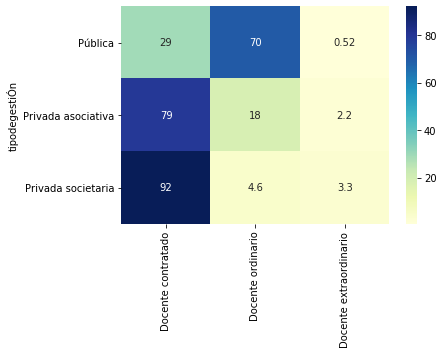

In [502]:
print('MAPA DE CALOR')
sns.heatmap(g22, annot=True, cmap="YlGnBu")
plt.show()

**Gráfico 2.3. Porcentaje de puestos docentes ordinarios, por categoría, según gran dominio y total nacional. Licenciamiento**

In [504]:
g23 = g2.groupby('dominio')[['Docente principal', 'Docente asociado', 'Docente auxiliar']].agg('sum').transpose()
g23['Total nacional'] = g23.sum(axis = 1)
g23 = g23.transpose()

dominio = ['Lima metropolitana', 'Costa', 'Sierra', 'Selva', 'Total nacional']
g23.index = pd.CategoricalIndex(g23.index, categories=dominio, ordered=True)
g23 = g23.sort_index()

g23

,Docente principal,Docente asociado,Docente auxiliar
dominio,,,
Lima metropolitana,2642.0,3515.0,3278.0
Costa,1755.0,1452.0,1085.0
Sierra,2490.0,2037.0,1510.0
Selva,539.0,639.0,428.0
Total nacional,7426.0,7643.0,6301.0


In [505]:
g23 = g23.apply(lambda x: x/x.sum()*100, axis=1)
g23

,Docente principal,Docente asociado,Docente auxiliar
dominio,,,
Lima metropolitana,28.002120,37.254902,34.742978
Costa,40.890028,33.830382,25.279590
Sierra,41.245652,33.741925,25.012423
Selva,33.561644,39.788294,26.650062
Total nacional,34.749649,35.765091,29.485260


GRÁFICO DE BARRAS


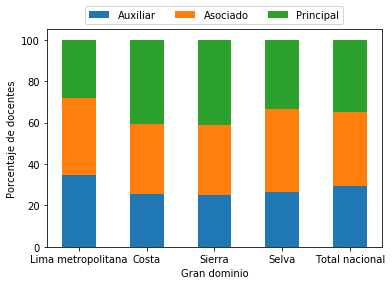

In [507]:
#Plot
print('GRÁFICO DE BARRAS')
plt.bar(g23.index, g23['Docente auxiliar'], 0.5, label = 'Auxiliar')
plt.bar(g23.index, g23['Docente asociado'], 0.5, bottom = g23['Docente auxiliar'], label = 'Asociado')
plt.bar(g23.index, g23['Docente principal'], 0.5, bottom = g23['Docente auxiliar'] + g23['Docente asociado'], label = 'Principal')
plt.xlabel('Gran dominio')
plt.ylabel('Porcentaje de docentes')
plt.legend(loc = 'lower center', bbox_to_anchor = (0.5,1), ncol = 3)
plt.show()

MAPA DE CALOR


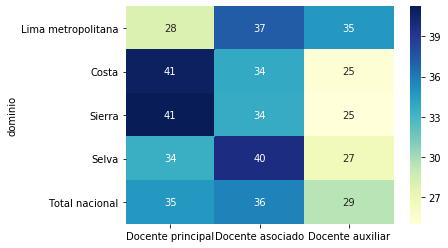

In [508]:
print('MAPA DE CALOR')
sns.heatmap(g23, annot=True, cmap="YlGnBu")
plt.show()

**Gráfico 2.4. Porcentaje de puestos docentes, por régimen de dedicación, según gran dominio y total nacional. Licenciamiento**

**Gráfico 2.5. Evolución del porcentaje de puestos docentes, por régimen de dedicación según tipo de gestión, 2010. Licenciamiento**

**Gráfico 2.6. Promedio de horas lectivas, por régimen de dedicación, según gran dominio y total nacional. Licenciamiento**

**Gráfico 2.8. Promedio de estudiantes por docente, por tipo de gestión, según gran dominio y total nacional. Licenciamiento**

**Gráfico 2.9. Porcentaje de puestos docentes, por grado académico, según gran dominio y total nacional. Licenciamiento**

**Gráfico 2.10. Porcentaje de puestos docentes, por grado académico, según tipo de gestión. Licenciamiento**

**Gráfico 2.11. Porcentaje de puestos ocupados por docentes con títulos de posgrado emitidos en el extranjero, según país de emisión. Licenciamiento**

**Gráfico 2.12. Porcentaje de puestos ocupados por docentes con títulos de maestría emitidos en el extranjero, según país de emisión. Licenciamiento**

**Gráfico 2.13. Porcentaje de puestos ocupados por docentes con títulos de doctorado emitidos en el extranjero, según país de emisión. Licenciamiento**

**Tabla 2.1. Porcentaje de docentes con títulos de posgrado emitidos en el extranjero, según país de emisión y tipo de gestión. Licenciamiento**

**Gráfico 2.14. Porcentaje de puestos ocupados por docentes con títulos de posgrado emitidos en universidades extranjeras presentes en rankings internacionales, por tipo de gestión, según gran dominio y total nacional. Licenciamiento**

**Gráfico 2.15. Porcentaje de puestos ocupados por docentes con grado de doctor obtenido en el extranjero, por tipo de gestión, según gran dominio y total nacional. Licenciamiento**

**Gráfico 2.16. Número de docentes registrados en el RENACYT, por tipo de gestión, según gran dominio y total nacional, 2019**

**Gráfico 2.17. Número de docentes registrados en el RENACYT, según tipo de gestión, 2019**